In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("insurance.csv")

# Preview data
print(df.head())
print(df.info())
print(df.describe())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

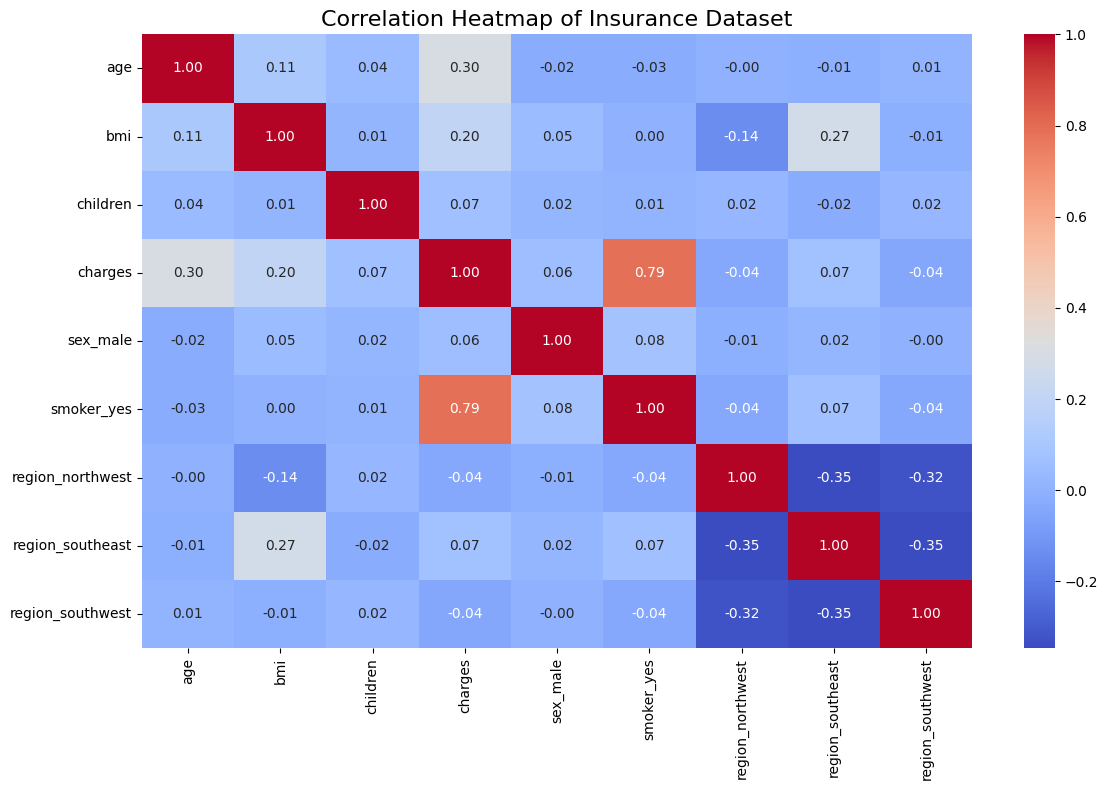

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("insurance.csv")

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
corr = df_encoded.corr()

# Plot full correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=False)
plt.title("Correlation Heatmap of Insurance Dataset", fontsize=16)
plt.tight_layout()
plt.show()


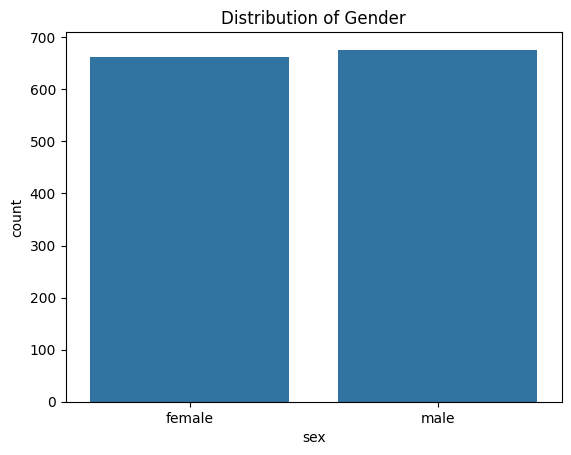

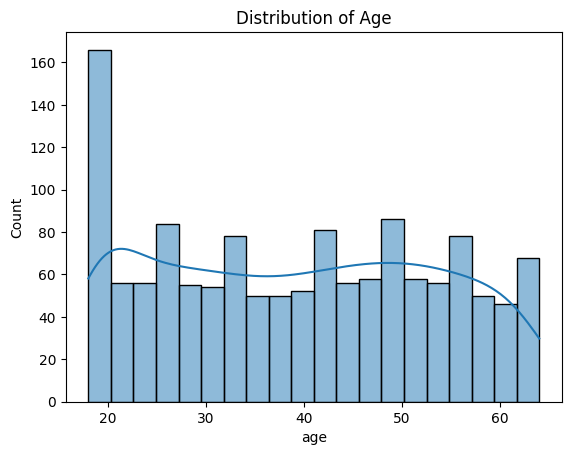

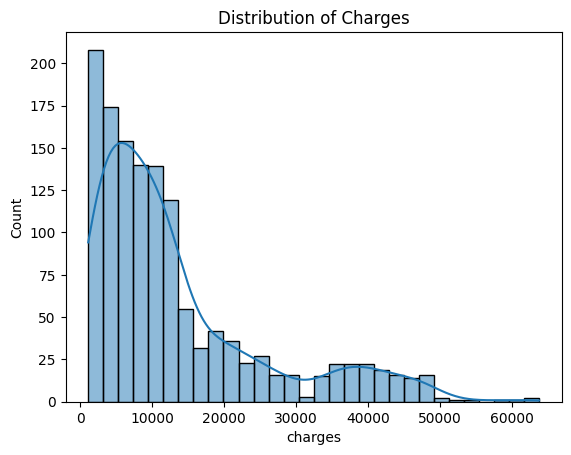

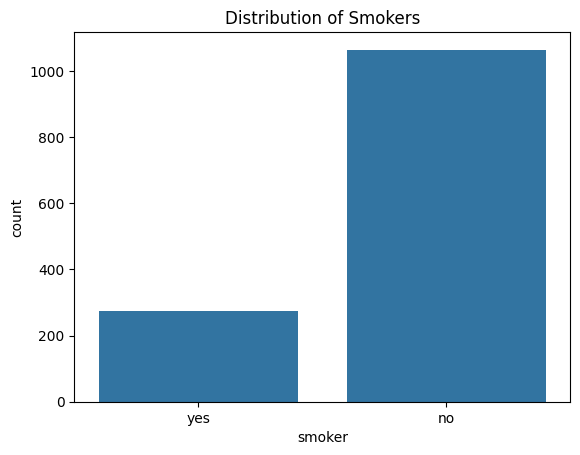

In [3]:
# -----------------------------
# 3. Distribution plots
# -----------------------------
# Gender distribution
sns.countplot(x="sex", data=df)
plt.title("Distribution of Gender")
plt.show()

# Age distribution
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

# Charges distribution
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.show()

# Smoker distribution
sns.countplot(x="smoker", data=df)
plt.title("Distribution of Smokers")
plt.show()

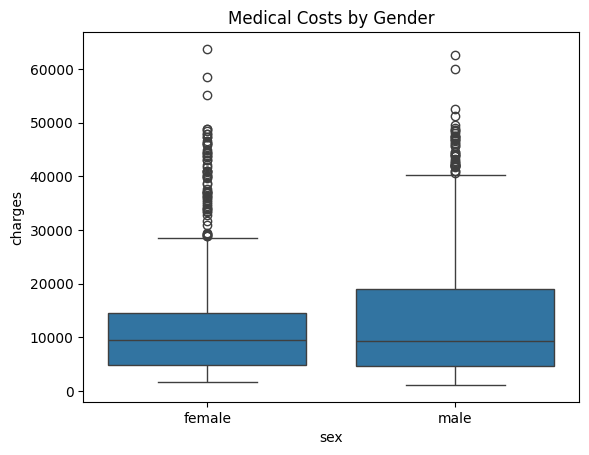

In [4]:
# -----------------------------
# 4. Medical costs by gender
# -----------------------------
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Medical Costs by Gender")
plt.show()

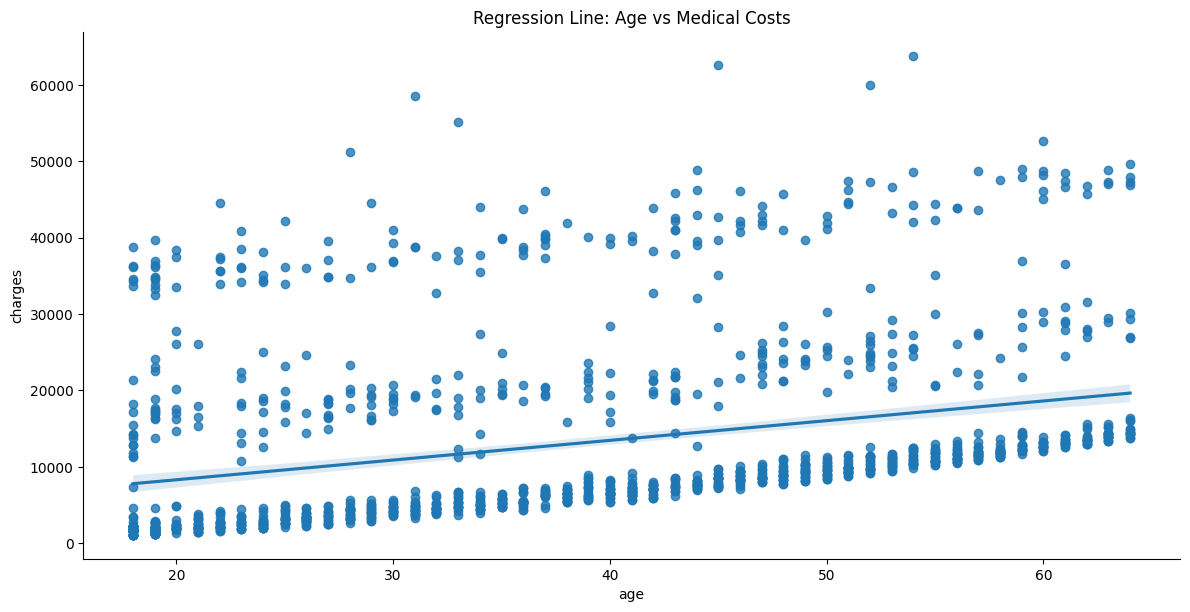

In [5]:
# -----------------------------
# 5. Regression line (Age vs Medical Costs)
# -----------------------------
sns.lmplot(x="age", y="charges", data=df, aspect=2, height=6)
plt.title("Regression Line: Age vs Medical Costs")
plt.show()

In [6]:
# -----------------------------
# 6. Train & Test Linear Regression Model
# -----------------------------
# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [7]:
# -----------------------------
# 7. Evaluate Model
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Squared Error: 33596915.85
Root Mean Squared Error: 5796.28
R² Score: 0.7836
